In [80]:
import sys
sys.path.append('/home/obesity')
import pandas as pd
import numpy as np
from bmi.snp_encoding_and_labeling import encode_snp_data_get_bmi_label
from bmi.customized_activation_function import CustomizedAct
from matplotlib import pyplot as plt
from bmi.model import create_dense_model, create_deep_dense_model,dense_block 
from bmi.plot import show_bmi_distribution,show_customized_act,show_predicting_distribution,show_predicting_result,show_training_history
import os
os.environ['CUDA_VISIBLE_DEVICES']= '3'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [79]:
import importlib
importlib.reload(sys.modules['bmi.model'])

<module 'bmi.model' from '/home/obesity/bmi/model.py'>

In [3]:
# define path
train_data_path = '/home/obesity/snp_data/snp_data_1112/Train_Male_SNP_5631_#_12551.tsv'
valid_data_path = '/home/obesity/snp_data/snp_data_1112/Valid_Male_SNP_5631_#_1395.tsv'
test_data_path = '/home/obesity/snp_data/snp_data_1112/Test_Male_SNP_5631_#_1550.tsv'
train_bmi_data_path ='/home/obesity/input_data/ped_1112/1105_male_train.txt'
test_bmi_data_path ='/home/obesity/input_data/ped_1112/1105_male_test.txt'

In [4]:
train_data = pd.read_table(train_data_path)
valid_data = pd.read_table(valid_data_path)
test_data = pd.read_table(test_data_path)

In [5]:
train_array, train_labels = encode_snp_data_get_bmi_label(train_data, train_bmi_data_path)
valid_array, valid_labels = encode_snp_data_get_bmi_label(valid_data, train_bmi_data_path)
test_array, test_labels = encode_snp_data_get_bmi_label(test_data, test_bmi_data_path)

In [6]:
def array_split_c(data_list,labels):
    fat_data = []
    not_fat_data = []
    fat_label = []
    not_fat_label = []
    for data,label in zip(data_list,labels):
        if label >= 30:
            fat_label.append(1)
            fat_data.append(data)
        else:
            not_fat_label.append(0)
            not_fat_data.append(data)
    return {
        "fat":{
            "label":fat_label,
            "data":fat_data
        },
        "not_fat":{
            "label":not_fat_label,
            "data":not_fat_data
        }
    }

In [7]:
train_split = array_split_c(train_array,train_labels)
valid_split = array_split_c(valid_array,valid_labels)
test_split = array_split_c(test_array,test_labels)

In [8]:
train_obesity_array, train_obesity_labels,train_normal_array, train_normal_labels= train_split['fat']['data'], train_split['fat']['label'], train_split['not_fat']['data'], train_split['not_fat']['label']
valid_obesity_array, valid_obesity_labels,valid_normal_array, valid_normal_labels= valid_split['fat']['data'], valid_split['fat']['label'], valid_split['not_fat']['data'], valid_split['not_fat']['label']
test_obesity_array, test_obesity_labels,test_normal_array, test_normal_labels= test_split['fat']['data'], test_split['fat']['label'], test_split['not_fat']['data'], test_split['not_fat']['label']


In [9]:
train_array_c = np.array(train_obesity_array+train_normal_array)
train_labels_c = np.array(train_obesity_labels+train_normal_labels)
valid_array_c = np.array(valid_obesity_array+valid_normal_array)
valid_labels_c = np.array(valid_obesity_labels+valid_normal_labels)
test_array_c = np.array(test_obesity_array+test_normal_array)
test_labels_c = np.array(test_obesity_labels+test_normal_labels)

In [26]:
from tensorflow.keras.utils import to_categorical
to_categorical(train_labels_c)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [40]:
def array_split_3(data_list,labels):
    fat_data = []
    normal_data = []
    thin_data = []
    fat_label = []
    normal_label = []
    thin_label = []
    for data,label in zip(data_list,labels):
        if label >= 30:
            fat_label.append(0)
            fat_data.append(data)
        elif label < 30 and label >= 24:
            normal_label.append(1)
            normal_data.append(data)
        else:
            thin_label.append(2)
            thin_data.append(data)
    return {
        "fat":{
            "label":fat_label,
            "data":fat_data
        },
        "normal":{
            'label':normal_label,
            'data':normal_data
        },
        "thin":{
            "label":thin_label,
            "data":thin_data
        }
    }

In [41]:
train_split = array_split_3(train_array,train_labels)
valid_split = array_split_3(valid_array,valid_labels)
test_split = array_split_3(test_array,test_labels)

In [42]:
train_obesity_array, train_obesity_labels,train_normal_array, train_normal_labels, train_thin_array, train_thin_labels= train_split['fat']['data'], train_split['fat']['label'], train_split['normal']['data'], train_split['normal']['label'], train_split['thin']['data'], train_split['thin']['label'] 
valid_obesity_array, valid_obesity_labels,valid_normal_array, valid_normal_labels, valid_thin_array, valid_thin_labels= valid_split['fat']['data'], valid_split['fat']['label'], valid_split['normal']['data'], valid_split['normal']['label'], valid_split['thin']['data'], valid_split['thin']['label']
test_obesity_array, test_obesity_labels,test_normal_array, test_normal_labels, test_thin_array, test_thin_labels= test_split['fat']['data'], test_split['fat']['label'], test_split['normal']['data'], test_split['normal']['label'], test_split['thin']['data'], test_split['thin']['label']

In [92]:
train_array_c = np.array(train_obesity_array+train_normal_array+train_thin_array)
train_labels_c = to_categorical(np.array(train_obesity_labels+train_normal_labels+train_thin_labels))
valid_array_c = np.array(valid_obesity_array+valid_normal_array+valid_thin_array)
valid_labels_c = np.array(valid_obesity_labels+valid_normal_labels+valid_thin_labels)
test_array_c = np.array(test_obesity_array+test_normal_array+test_thin_array)
test_labels_c = to_categorical(np.array(test_obesity_labels+test_normal_labels+test_thin_labels))

In [117]:
dict(zip(*np.unique(np.argmax(train_labels_c,1), return_counts=True)))

{0: 1372, 1: 6705, 2: 4474}

In [ ]:
w = []
for i in train_labels_c:
    if i == 0:
        w.append(24)
    elif i == 1:
        w.append(4)
    else:
        w.append(6)


In [164]:
w = {0:1, 1:10}

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
from tensorflow.keras import activations
model = create_deep_dense_model(len(train_array_c[1]),len(train_labels_c[1]),activations.softmax)
model.compile(optimizer = optimizers.Adam(lr=1e-3), loss='categorical_crossentropy',metrics=['accuracy'])
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-5, verbose=1)
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=100, verbose=1)
history = model.fit(train_array_c, train_labels_c,
                    #class_weight=w,
                    validation_data=(np.array(valid_array_c), np.array(valid_labels_c)),
                    batch_size= 128, epochs=500, verbose=1,
                    callbacks=[reduce_lr, early_stop])

In [84]:
def show_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
    fig.suptitle('Train History', fontsize=15)
    ax1.set(xlabel='Epoch', ylabel='acc')
    ax1.set_title('Accuracy')
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax2.set_title('Loss')
    ax2.set(xlabel='Epoch', ylabel='loss')
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    fig.show()

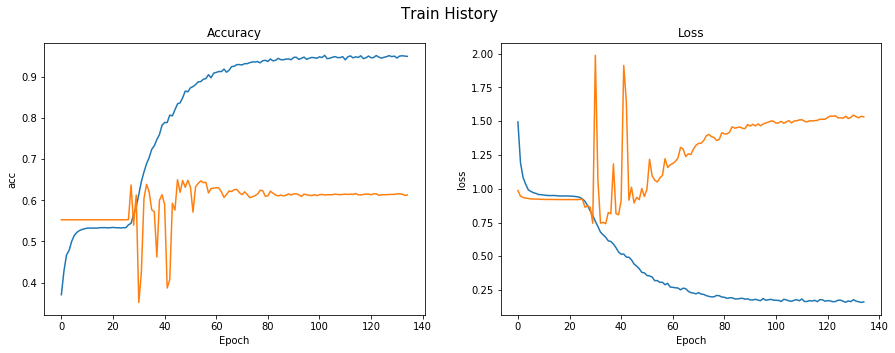

In [85]:
show_training_history(history)

In [93]:
from sklearn.metrics import accuracy_score,accuracy_score,f1_score,matthews_corrcoef,confusion_matrix,roc_curve,auc
import matplotlib.pyplot as plt
def metric_array(test_data, test_labels, model):
    labels_score = model.predict(test_data)
    accuracy = accuracy_score(test_labels, labels_score.round())
    confusion = confusion_matrix(test_labels, labels_score.round())
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    precision = TP / float(TP + FP)
    sensitivity = TP / float(FN + TP)
    specificity = TN / float(TN + FP)
    f1 = f1_score(test_labels, labels_score.round())
    mcc = matthews_corrcoef(test_labels, labels_score.round()) 
    metric = [accuracy,precision,sensitivity,specificity,f1,mcc]
    return {'accuracy':accuracy,
            'precision':precision,
            'sensitivity':sensitivity,
            'specificity':specificity,
            'f1':f1,
            'mcc':mcc,
           'metric':metric},confusion

In [88]:
metric_array(test_array_c, test_labels_c, model)

({'accuracy': 0.8103225806451613,
  'precision': 0.1111111111111111,
  'sensitivity': 0.08791208791208792,
  'specificity': 0.9064327485380117,
  'f1': 0.09815950920245398,
  'mcc': -0.006271190676016863,
  'metric': [0.8103225806451613,
   0.1111111111111111,
   0.08791208791208792,
   0.9064327485380117,
   0.09815950920245398,
   -0.006271190676016863]},
 array([[1240,  128],
        [ 166,   16]]))

In [106]:
from sklearn.metrics import classification_report
from numpy import argmax
labels_score = np.argmax(model.predict(valid_array_c),axis=1)
accuracy = accuracy_score(valid_labels_c, labels_score)
target_names = ['obesity', 'normal', 'thin']
print(classification_report(valid_labels_c, labels_score, target_names=target_names))

              precision    recall  f1-score   support

     obesity       0.53      0.45      0.49       133
      normal       0.65      0.65      0.65       771
        thin       0.57      0.59      0.58       491

    accuracy                           0.61      1395
   macro avg       0.58      0.57      0.57      1395
weighted avg       0.61      0.61      0.61      1395

